In [70]:
import pandas as pd
import numpy as np
import datetime

import json
from pandas.io.json import json_normalize

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

from collections import Counter

import seaborn as sns


In [3]:
df_users_eng = pd.read_csv('takehome_user_engagement.csv')

In [4]:
df_users_eng.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [5]:
df_users = pd.read_csv('takehome_users.csv',encoding='latin-1')

In [6]:
df_users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [7]:
# Checking both the dataframes whether they have same nuuber of users or not.

print('Number of users in df_users', (df_users.object_id.nunique()))
print('Number of users in df_users_eng', (df_users_eng.user_id.nunique()))

Number of users in df_users 12000
Number of users in df_users_eng 8823


In [8]:
# We can see, there are around 3K users id missing in df_users_eng.
# Precisely, there are 3177 users who have created the account but never used the application. 
# Thus, data is unavailable in df_users data frame

In [9]:
# Lets make the 'Time stamp' field as an index. it would be easy to analyse the data further.

df_users_eng.time_stamp = pd.to_datetime(df_users_eng.time_stamp)

# df_users_eng.set_index('time_stamp',inplace = True)

In [10]:
# Most of the analysis is going to be based on time.
# Thus, we need to convert all time/date related column into datetime format

In [11]:
df_users.creation_time = pd.to_datetime(df_users.creation_time)
#df_users.last_session_creation_time = pd.to_datetime(df_users.last_session_creation_time,unit='s')
df_users['last_session_creation_time'] = pd.to_datetime(df_users['last_session_creation_time'], unit='s')

In [12]:
df_users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0


Let's start with finding the adopted users.

In [13]:

time_delta_7 = datetime.timedelta(7)
adopted_users_dict = {}

temp1 = sorted(list(df_users_eng['user_id'].unique()))

for user_id in temp1:
    adopted_user = False
    temp = df_users_eng[df_users_eng['user_id'] == user_id]
    temp = temp.sort_values('time_stamp')
    
    for row in temp.itertuples():
        if adopted_user == True:
            continue
        time = temp.get_value(row[0], 'time_stamp')
        if len(temp[(temp['time_stamp'] >= time) & (temp['time_stamp'] <= (time + time_delta_7))]) >= 3:
            adopted_user = True
    
    adopted_users_dict[user_id] = adopted_user

In [61]:
# Explore the user adoption labels
count_df = pd.DataFrame.from_dict(Counter(list(adopted_users_dict.values())), orient='index').reset_index()

print('Adopted user in percentage  : ',round((count_df.loc[1]/(count_df.loc[1]+count_df.loc[0])*100)[0],2))

Adopted user in percentage  :  18.77


In [64]:
df_users['adopted'] = False # Target variable added 
df_users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,False
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,False
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,False
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,False
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,False


In [66]:
# Replace adopted target class with correct flags
for row in (df_users[np.logical_not(df_users['last_session_creation_time'].isnull())]).itertuples():
    adopted_value = adopted_users_dict[df_users.get_value(row[0], 'object_id')]
    df_users.set_value(row[0], 'adopted', adopted_value)
    
print('{:.2f}% of all users who have signed up for the application are considered \'adopted users\'.'\
          .format(len(df_users[df_users['adopted'] == True])/len(df_users)*100))

13.80% of all users who have signed up for the application are considered 'adopted users'.


In [68]:
# Check on the higher risk/more defined features
for feature in ['creation_source', 'opted_in_to_mailing_list', 'enabled_for_marketing_drip']:
    print('{} feature:'.format(feature))
    print(df_users[feature].value_counts(), end='\n\n')

creation_source feature:
ORG_INVITE            4254
GUEST_INVITE          2163
PERSONAL_PROJECTS     2111
SIGNUP                2087
SIGNUP_GOOGLE_AUTH    1385
Name: creation_source, dtype: int64

opted_in_to_mailing_list feature:
0    9006
1    2994
Name: opted_in_to_mailing_list, dtype: int64

enabled_for_marketing_drip feature:
0    10208
1     1792
Name: enabled_for_marketing_drip, dtype: int64



**All features seem to take appropriate values, and so now we can move on to creating a classifier model on the adopted user class:**

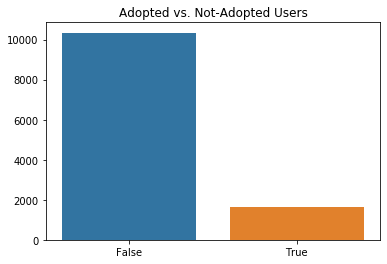

In [72]:

# Take another look at the distribution of the target class
sns.barplot(x = list(df_users['adopted'].value_counts().index), y = df_users['adopted'].value_counts())
plt.ylabel('')
plt.title('Adopted vs. Not-Adopted Users');

Since this dataset is rather imbalanced, we have used the SMOTE algorithm in WEKA to oversample the data and enhance the presence of the True adopted user class. In addition, we have dropped any features that are used for identification or are in datetime format. We will read in the reduced dataset and explore the target class:

In [75]:
df_users_trim = df_users[['creation_source','opted_in_to_mailing_list','enabled_for_marketing_drip','org_id','adopted']]

In [76]:
df_users_trim.head()

,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,adopted
0,GUEST_INVITE,1,0,11,False
1,ORG_INVITE,0,0,1,True
2,ORG_INVITE,0,0,94,False
3,GUEST_INVITE,0,0,1,False
4,GUEST_INVITE,0,0,193,False


In [95]:
from sklearn.metrics import roc_curve, auc, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

In [92]:
# One-hot-encode creation_source
df_encoded = pd.get_dummies(df_users_trim, columns = ['creation_source'])

df_encoded.head()

,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,adopted,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH
0,1,0,11,False,1,0,0,0,0
1,0,0,1,True,0,1,0,0,0
2,0,0,94,False,0,1,0,0,0
3,0,0,1,False,1,0,0,0,0
4,0,0,193,False,1,0,0,0,0


In [93]:
# Split into train and test sets

train, test = train_test_split(df_encoded, test_size=.30, 
                               random_state=42, stratify=df_encoded['adopted'])

train.reset_index(drop=True, inplace=True)
target = train['adopted']
train = train.drop('adopted', axis=1)

test.reset_index(drop=True, inplace=True)
test_target = test['adopted']
test = test.drop('adopted', axis=1)

print('Train shape: {}\n Test shape: {}'.format(train.shape, test.shape))

Train shape: (8400, 8)
 Test shape: (3600, 8)


In [99]:
# Train the model on the full training data and test on the test set
final_clf = clf.fit(train, target)


test_preds = final_clf.predict(test)


print('Test set accuracy: {:.2f}\nConfusion Matrix:\n{}'\
          .format(accuracy_score(test_target, test_preds)*100, 
                  confusion_matrix(test_target, test_preds)))

Test set accuracy: 81.47
Confusion Matrix:
[[2865  238]
 [ 429   68]]


In [100]:
# Find feature importances
feature_importance = pd.DataFrame(final_clf.feature_importances_).T
feature_importance.columns = list(train.columns)
feature_importance = feature_importance.T
feature_importance.columns = ['feature_importance']
feature_importance.sort_values('feature_importance', ascending=False)

,feature_importance
org_id,0.959451
opted_in_to_mailing_list,0.011715
creation_source_PERSONAL_PROJECTS,0.009850
enabled_for_marketing_drip,0.006965
creation_source_SIGNUP_GOOGLE_AUTH,0.003944
creation_source_GUEST_INVITE,0.003613
creation_source_ORG_INVITE,0.002339
creation_source_SIGNUP,0.002124
